<a href="https://colab.research.google.com/github/leandrorodor/ALR-Machine_Learning_AS/blob/main/random_forest_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

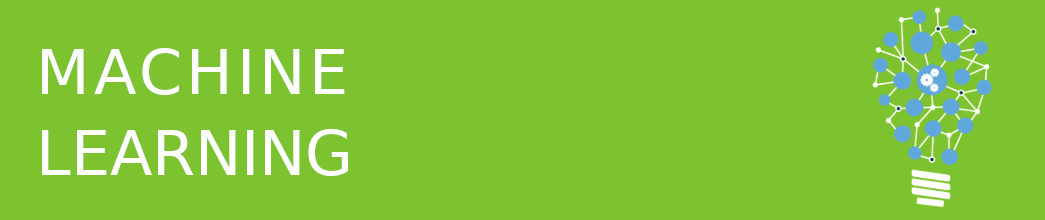

In [13]:
from IPython.display import Image
Image('/content/sample_data/banner_machine_learning.png')

## Random Forest e Bagging

### Imports gerais

In [1]:
import pandas as pd
import numpy as np 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Imports modelos

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor,BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

Download Dataset: [movies_multilinear_reg.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/movies_multilinear_reg.csv)

#### Carregando o dataset

In [3]:
filmes = pd.read_csv('/content/sample_data/movies_multilinear_reg.csv')

In [ ]:
filmes.head(5)

,movieId,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Bilheteria
0,1,Toy Story (1995),0,0,0,0,0,0,0,1,1,1,1,0,1,103.468310,11.048216,5623234.602
1,2,Jumanji (1995),0,0,0,0,0,0,0,1,0,0,1,0,1,112.337916,14.927678,5714951.757
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,1,0,0,0,0,116.245732,27.114597,9524339.124
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,0,1,0,0,1,0,120.317732,4.994242,6331568.779
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,110.023572,19.142246,6409617.277


In [ ]:
filmes.shape

(9125, 18)

#### Separando o dataset

In [4]:
filmes_caract = filmes[filmes.columns[2:17]]
filmes_labels = filmes[filmes.columns[17:]]

In [5]:
filmes_caract.head(5)

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
0,0,0,0,0,0,0,0,1,1,1,1,0,1,103.468310,11.048216
1,0,0,0,0,0,0,0,1,0,0,1,0,1,112.337916,14.927678
2,0,0,0,0,1,0,0,0,1,0,0,0,0,116.245732,27.114597
3,0,0,0,0,1,0,0,0,1,0,0,1,0,120.317732,4.994242
4,0,0,0,0,0,0,0,0,1,0,0,0,0,110.023572,19.142246


In [6]:
filmes_labels.head(5)

,Bilheteria
0,5623234.602
1,5714951.757
2,9524339.124
3,6331568.779
4,6409617.277


#### Split dos datasets em treino e teste

In [7]:
treino, teste, treino_labels, teste_labels = train_test_split(filmes_caract, filmes_labels)
print('Shape do treino {}, Shape do treino_labels {}'.format(treino.shape, treino_labels.shape))
print('Shape do teste {}, Shape do teste_labels {}'.format(teste.shape, teste_labels.shape))
print('Proporção Treino / Teste: {0:.2f}% / {1:.2f}%'.format(len(treino)/len(filmes_caract)*100, len(teste)/len(filmes_caract)*100))

Shape do treino (6843, 15), Shape do treino_labels (6843, 1)
Shape do teste (2282, 15), Shape do teste_labels (2282, 1)
Proporção Treino / Teste: 74.99% / 25.01%


#### Reshaping com numpy

In [15]:
treino_arr = np.array(treino).reshape(len(treino),15)
teste_arr = np.array(teste).reshape(len(teste),15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

## Usando modelo BaggingRegressor

In [14]:
modelo_br = BaggingRegressor()
modelo_br.fit(treino_arr, treino_labels_arr)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [17]:
score_treino = modelo_br.score(treino_arr, treino_labels_arr)
score_teste = modelo_br.score(teste_arr, teste_labels_arr)
print('BaggingRegressor: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

BaggingRegressor: Acertamos 96.25% no treino, Acertamos 79.45% no teste


#### Para comparação usando modelo LinearRegression

In [18]:
modelo_reg = LinearRegression()
modelo_reg.fit(treino_arr, treino_labels_arr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
score_treino = modelo_reg.score(treino_arr, treino_labels_arr)
score_teste = modelo_reg.score(teste_arr, teste_labels_arr)
print('LinearRegression: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

LinearRegression: Acertamos 82.56% no treino, Acertamos 83.34% no teste


#### Usando BaggingRegressor(n_estimators=20)

In [23]:
modelo_br_20 = BaggingRegressor(n_estimators=25)
modelo_br_20.fit(treino_arr, treino_labels_arr)
score_treino = modelo_br_20.score(treino_arr, treino_labels_arr)
score_teste = modelo_br_20.score(teste_arr, teste_labels_arr)
print('BaggingRegressor(n_estimators=20): Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

BaggingRegressor(n_estimators=20): Acertamos 96.88% no treino, Acertamos 80.24% no teste


## Classifcação com BaggingClassifier
Download Dataset: [avaliacoes_usuario.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/avaliacoes_usuario.csv)

#### Carregando Dataset da avaliações do usuário (gostos)

In [25]:
gostos = pd.read_csv('/content/sample_data/avaliacoes_usuario.csv', encoding= 'unicode_escape')
gostos.head(5)

,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Gostou
0,Nixon (1995),0,0,0,0,0,0,0,0,0,0,0,1,0,114.496547,7.930748,1
1,Leaving Las Vegas (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,110.140191,18.276555,1
2,Persuasion (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,105.747597,16.582232,1
3,Babe (1995),0,0,0,0,0,0,0,0,0,0,1,1,0,126.131978,13.004553,1
4,Carrington (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,85.025469,14.418120,1


#### Separando dataset

In [26]:
caract = gostos[gostos.columns[1:16]]
labels = gostos[gostos.columns[16:]]
treino, teste, treino_labels, teste_labels = train_test_split(caract, labels)

#### Reshaping do treino e teste com numpy

In [27]:
treino_arr = np.array(treino).reshape(len(treino), 15)
teste_arr = np.array(teste).reshape(len(teste), 15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

#### Usando BaggingClassifier

In [28]:
modelo_bc = BaggingClassifier()
modelo_bc.fit(treino_arr, treino_labels_arr)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [29]:
previsoes = modelo_bc.predict(teste_arr)
acuracia = accuracy_score(teste_labels_arr, previsoes)
print('Acuracia com BaggingClassifier no teste: {0:.2f}%'.format(acuracia * 100))

Acuracia com BaggingClassifier no teste: 78.24%


## Usando RandomForestRegressor

Download Dataset: [movies_multilinear_reg.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/movies_multilinear_reg.csv)

#### Carregando o dataset

In [31]:
filmes = pd.read_csv('/content/sample_data/movies_multilinear_reg.csv')

#### Separando o dataset

In [32]:
filmes_caract = filmes[filmes.columns[2:17]]
filmes_labels = filmes[filmes.columns[17:]]

#### Split dos datasets em treino e teste

In [33]:
treino, teste, treino_labels, teste_labels = train_test_split(filmes_caract, filmes_labels)
print('Shape do treino {}, Shape do treino_labels {}'.format(treino.shape, treino_labels.shape))
print('Shape do teste {}, Shape do teste_labels {}'.format(teste.shape, teste_labels.shape))
print('Proporção Treino / Teste: {0:.2f}% / {1:.2f}%'.format(len(treino)/len(filmes_caract)*100, len(teste)/len(filmes_caract)*100))

Shape do treino (6843, 15), Shape do treino_labels (6843, 1)
Shape do teste (2282, 15), Shape do teste_labels (2282, 1)
Proporção Treino / Teste: 74.99% / 25.01%


#### Reshaping com numpy

In [34]:
treino_arr = np.array(treino).reshape(len(treino),15)
teste_arr = np.array(teste).reshape(len(teste),15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

#### Usando modelo RandomForestRegressor

In [35]:
modelo_rfr = RandomForestRegressor()
modelo_rfr.fit(treino_arr, treino_labels_arr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
score_treino = modelo_rfr.score(treino_arr, treino_labels_arr)
score_teste = modelo_rfr.score(teste_arr, teste_labels_arr)
print('RandomForestRegressor: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

RandomForestRegressor: Acertamos 97.22% no treino, Acertamos 81.17% no teste


## Classificação com RandomForestClassifier

#### Carregando Dataset da avaliações do usuário (gostos)

In [39]:
gostos = pd.read_csv('/content/sample_data/avaliacoes_usuario.csv', encoding= 'unicode_escape')

#### Separando dataset

In [40]:
caract = gostos[gostos.columns[1:16]]
labels = gostos[gostos.columns[16:]]
treino, teste, treino_labels, teste_labels = train_test_split(caract, labels)

#### Reshaping do treino e teste com numpy

In [41]:
treino_arr = np.array(treino).reshape(len(treino), 15)
teste_arr = np.array(teste).reshape(len(teste), 15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

## Usando RandomForestClassifier

In [42]:
modelo_rfc = RandomForestClassifier()
modelo_rfc.fit(treino_arr, treino_labels_arr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
previsoes = modelo_rfc.predict(teste_arr)
acuracia = accuracy_score(teste_labels_arr, previsoes)
print('Acuracia com RandomForestClassifier no teste: {0:.2f}%'.format(acuracia * 100))

Acuracia com RandomForestClassifier no teste: 75.29%


## Usando RandomForestClassifier(max_features=5, max_depth=5)

In [44]:
modelo_rfc_max5 = RandomForestClassifier(max_features=5, max_depth=5)
modelo_rfc_max5.fit(treino_arr, treino_labels_arr)
previsoes = modelo_rfc_max5.predict(teste_arr)
acuracia = accuracy_score(teste_labels_arr, previsoes)
print('Acuracia com RandomForestClassifier no teste: {0:.2f}%'.format(acuracia * 100))

Acuracia com RandomForestClassifier no teste: 81.76%


# Boosting

Download Dataset: [movies_multilinear_reg.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/movies_multilinear_reg.csv)

#### Carregando o dataset

In [45]:
filmes = pd.read_csv('/content/sample_data/movies_multilinear_reg.csv')

#### Split dos datasets em treino e teste

In [46]:
filmes_caract = filmes[filmes.columns[2:17]]
filmes_labels = filmes[filmes.columns[17:]]

#### Split dos dados treino e teste

In [47]:
treino, teste, treino_labels, teste_labels = train_test_split(filmes_caract, filmes_labels)
print('Shape do treino {}, Shape do treino_labels {}'.format(treino.shape, treino_labels.shape))
print('Shape do teste {}, Shape do teste_labels {}'.format(teste.shape, teste_labels.shape))
print('Proporção Treino / Teste: {0:.2f}% / {1:.2f}%'.format(len(treino)/len(filmes_caract)*100, len(teste)/len(filmes_caract)*100))

Shape do treino (6843, 15), Shape do treino_labels (6843, 1)
Shape do teste (2282, 15), Shape do teste_labels (2282, 1)
Proporção Treino / Teste: 74.99% / 25.01%


#### Reshaping do treino e teste com numpy

In [48]:
treino_arr = np.array(treino).reshape(len(treino), 15)
teste_arr = np.array(teste).reshape(len(teste), 15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

## Usando AdaBoostRegressor

In [49]:
modelo_ada = AdaBoostRegressor()
modelo_ada.fit(treino_arr, treino_labels_arr)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [50]:
score_treino = modelo_ada.score(treino_arr, treino_labels_arr)
score_teste = modelo_ada.score(teste_arr, teste_labels_arr)
print('AdaBoostRegressor: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

AdaBoostRegressor: Acertamos 80.24% no treino, Acertamos 79.45% no teste


## Usando GradientBoostingRegressor 

#### Separando o dataset

In [51]:
modelo_gbr = GradientBoostingRegressor()
modelo_gbr.fit(treino_arr, treino_labels_arr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
score_treino = modelo_gbr.score(treino_arr, treino_labels_arr)
score_teste = modelo_gbr.score(teste_arr, teste_labels_arr)
print('GradientBoostingRegressor: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

GradientBoostingRegressor: Acertamos 84.22% no treino, Acertamos 82.70% no teste


## Usando AdaBoostClassifier 

#### Carregando Dataset da avaliações do usuário (gostos)

In [55]:
gostos = pd.read_csv('/content/sample_data/avaliacoes_usuario.csv', encoding= 'unicode_escape')

#### Separando dataset

In [56]:
caract = gostos[gostos.columns[1:16]]
labels = gostos[gostos.columns[16:]]
treino, teste, treino_labels, teste_labels = train_test_split(caract, labels)

#### Reshaping do treino e teste com numpy

In [57]:
treino_arr = np.array(treino).reshape(len(treino), 15)
teste_arr = np.array(teste).reshape(len(teste), 15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

In [58]:
modelo_ada_cl = AdaBoostClassifier()
modelo_ada_cl.fit(treino_arr, treino_labels_arr)
previsoes = modelo_ada_cl.predict(teste_arr)
acuracia = accuracy_score(teste_labels_arr, previsoes)
print('Acuracia com AdaBoostClassifier no teste: {0:.2f}%'.format(acuracia * 100))

Acuracia com AdaBoostClassifier no teste: 74.71%


## Usando GradientBoostingClassifier

In [59]:
modelo_gb_cl = GradientBoostingClassifier()
modelo_gb_cl.fit(treino_arr, treino_labels_arr)
previsoes = modelo_gb_cl.predict(teste_arr)
acuracia = accuracy_score(teste_labels_arr, previsoes)
print('Acuracia com GradientBoostingClassifier no teste: {0:.2f}%'.format(acuracia * 100))

Acuracia com GradientBoostingClassifier no teste: 77.06%
